## **Data-Driven Real Estate: Classifying properties based on investment potential**

   
**Data sources**:
 
- *Zillow, Datarade, Realtor, National Association of Realtors (NAR), U.S. Census Bureau.*

**Summary**:


- **Objective**: *The primary goal of this project is to create a Machine Learning Classifier that categorizes properties based on the Return On Investment (ROI), dividing them into three categories:*  

    - *'No investment potential (NIP)',*
    - *'Moderate investment potential (MIP)',*
    - *'High investment potencial (HIP)'.*

***ROI**: Return on investment, or ROI, is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others.*

- **Exploratory Data Analysis (EDA)**:
    
    - *Collect and clean data on properties, including price, location, size and amenities, from sources like Zillow and Realtor.*

    - *Analyze the distribution of property values and investment trends by region and others variables.*

    - *Explore correlations between property features and ROI to identify the key determinants of investment potential.*

    - *Visualize trends and patterns in property investment returns across different geographical areas.*

- **Machine Learning approach**:

    - **Model development**: *Use classification algorithms (e.g., decision trees, random forests, logistic regression) to build the investment potential classifier.*

    - **Feature engineering**: *Create new variables that capture important aspects of property investment. These features are designed to enhance the model's ability to predict ROI by better representing the factors that influence property value.*

    - **Model evaluation**: *Assess model performance using metrics such as accuracy, precision, recall and F1 score to ensure reliable predictions.*

- **Potential impact**:
    - *This project aims to assist investors in identifying lucrative properties by providing data-driven insights into the investment potential of various real estate assets.*

    - *The classifier can help real estate professionals make informed decisions on property investments, ultimately improving portfolio performance.*

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

### 1. Load and visualisation of the dataset

In [102]:
# Loads the DataFrame we are going to work with.
housing_us = pd.read_csv("../data/real_estate_dataset.csv")

In [103]:
housing_us.head(10)

,property_id,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost,ROI_Simulated
0,1,Florida,Jacksonville,406571,1337,3,4,1.25,1971,609.8565,Yes,Yes,1,3,57,No,0.5,3634,1.398315
1,2,New York,Albany,437493,3305,5,3,1.22,1989,1093.7325,No,Yes,2,10,33,No,1.5,5992,-1.034621
2,3,California,San Francisco,1707564,3119,5,3,0.46,1981,5122.6920,Yes,Yes,1,5,38,No,1.5,5636,0.349184
3,4,Florida,Miami,1216300,3940,2,2,1.18,2022,1824.4500,No,No,0,10,56,Yes,0.5,1766,1.410877
4,5,Florida,Miami,985731,3172,5,3,0.88,1996,2464.3275,Yes,Yes,3,4,83,No,2.5,2066,0.792785
5,6,New York,New York City,943274,624,1,1,1.01,1976,2829.8220,Yes,Yes,3,3,30,Yes,0.5,1415,2.101683
6,7,California,Los Angeles,1294166,1239,5,4,0.72,2003,1941.2490,No,Yes,1,6,33,Yes,2.5,3872,-0.817681
7,8,California,San Francisco,1386125,2174,2,2,1.64,1990,3465.3125,Yes,Yes,1,3,85,No,2.5,3433,0.770629
8,9,Florida,Orlando,522274,3828,4,4,0.79,1987,1566.8220,Yes,No,1,4,40,Yes,2.5,5386,-0.468499
9,10,Texas,Austin,650362,3523,4,2,1.60,1979,975.5430,No,No,2,6,68,Yes,2.5,5781,-1.313123


In [104]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_id        15000 non-null  int64  
 1   state              15000 non-null  object 
 2   city               15000 non-null  object 
 3   price              15000 non-null  int64  
 4   area_sqft          15000 non-null  int64  
 5   bedrooms           15000 non-null  int64  
 6   bathrooms          15000 non-null  int64  
 7   lot_size_acres     15000 non-null  float64
 8   year_built         15000 non-null  int64  
 9   rental_income      15000 non-null  float64
 10  mainroad_access    15000 non-null  object 
 11  airconditioning    15000 non-null  object 
 12  garage_parking     15000 non-null  int64  
 13  school_rating      15000 non-null  int64  
 14  walkability_score  15000 non-null  int64  
 15  preferred_area     15000 non-null  object 
 16  tax_rate           150

In [105]:
housing_us.describe()

,property_id,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,garage_parking,school_rating,walkability_score,tax_rate,maintenance_cost,ROI_Simulated
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,7.734208e+05,2300.506800,3.006133,2.50040,1.057048,1996.071800,1805.866647,1.499267,5.472667,50.537333,1.512533,3500.860200,4.184399
std,4330.271354,4.665705e+05,982.827048,1.420081,1.11974,0.551297,15.279217,1231.216546,1.119978,2.880684,28.798343,0.820094,1448.668751,3.105302
min,1.000000,2.002470e+05,600.000000,1.000000,1.00000,0.100000,1970.000000,300.898500,0.000000,1.000000,1.000000,0.500000,1000.000000,-2.000000
25%,3750.750000,4.209155e+05,1451.000000,2.000000,2.00000,0.580000,1983.000000,934.248750,1.000000,3.000000,26.000000,0.500000,2243.000000,1.350270
50%,7500.500000,6.303125e+05,2310.500000,3.000000,2.00000,1.050000,1996.000000,1418.161500,1.000000,5.000000,51.000000,1.500000,3495.500000,4.000000
75%,11250.250000,9.898438e+05,3148.000000,4.000000,4.00000,1.540000,2009.000000,2313.746625,3.000000,8.000000,75.000000,2.500000,4761.000000,8.000000
max,15000.000000,2.499703e+06,3999.000000,5.000000,4.00000,2.000000,2022.000000,7459.329000,3.000000,10.000000,100.000000,2.500000,5999.000000,8.000000


#### 1.1. Description of what each column of the dataset represents

|COLUMN|MEANING|DATA TYPE|NOTE|EXAMPLE|
|---|---|---|---|---|
|**property_id**|*Unique identifier for each property*|*Integer*|*Used only as a reference; irrelevant for modeling*||
|**state**|*The state within the United States where the property is located*|*Categorical*||*California, Texas*|
|**city**|*The specific city within the state where the property is located*|*Categorical*||*Los Angeles, Austin*|
|**price**|*Sale price of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$400,000, $1,200,000*|
|**area_sqft**|*The livable area of the property in square feet*|*Continuous numeric*|**Unit**: *Square feet (sqft)*|*2,000 sqft, 3,500 sqft*|
|**bedrooms**|*Total number of bedrooms in the property*|*Discrete numeric*||*2, 4*|
|**bathrooms**|*Total number of bathrooms in the property*|*Discrete numeric*|*Full bathrooms (including shower) count as 1, toilets without shower count 0.5*|*1, 2.5*|
|**lot_size_acres**|*The size of the lot, in acres, on which the property is built*|*Continuous numeric*|**Unit**: *Acres. 1 acre = 43560 sqft*|*0.25, 1.5*|
|**year_built**|*The year the property was constructed*|*Integer*||*1995, 2010*|
|**rental_income**|*Estimated monthly rental income from the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$1,500, $3,200*|
|**mainroad_access**|*Indicates whether the property has direct access to a main road*|*Binary categorical*||*Yes, No*|
|**airconditioning**|*Indicates whether the property is equipped with an air conditioning system*|*Binary categorical*||*Yes, No*|
|**garage_parking**|*Number of parking spaces available in the garage*|*Discrete numeric*||*0, 2*|
|**school_rating**|*Average rating of nearby schools*|*Discrete numeric*|*From 1 (worst) to 10 (best)*|*5, 9*|
|**walkability_score**|*Walkability score, indicating how close essential services are*|*Discrete numeric*|*From 1 (low accessibility) to 100 (high accessibility)*|*70, 85*|
|**preferred_area**|*Indicates whether the property is located in a preferred or high-demand area*|*Binary categorical*||*Yes, No*|
|**tax_rate**|*Property tax rate*|*Continuous numeric*|**Unit**: *Percentage (%)*|*1.2%, 2.5%*|
|**maintenance_cost**|*Estimated annual maintenance cost of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$2,000, $5,000*|

In [106]:
# Remove 'property_id' column
housing_us.drop('property_id', axis = 1, inplace = True)

housing_us.head(5)

,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost,ROI_Simulated
0,Florida,Jacksonville,406571,1337,3,4,1.25,1971,609.8565,Yes,Yes,1,3,57,No,0.5,3634,1.398315
1,New York,Albany,437493,3305,5,3,1.22,1989,1093.7325,No,Yes,2,10,33,No,1.5,5992,-1.034621
2,California,San Francisco,1707564,3119,5,3,0.46,1981,5122.6920,Yes,Yes,1,5,38,No,1.5,5636,0.349184
3,Florida,Miami,1216300,3940,2,2,1.18,2022,1824.4500,No,No,0,10,56,Yes,0.5,1766,1.410877
4,Florida,Miami,985731,3172,5,3,0.88,1996,2464.3275,Yes,Yes,3,4,83,No,2.5,2066,0.792785


### 2. Train - Test split

*Before proceeding we should split our data in two parts: Train and Test.*

In [107]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_us, test_size = 0.2, random_state = 42)

### 3. Exploratory Data Analysis (EDA)

*This process will be performed only on the training set in order not to 'contaminate' the test data and to treat that set as purely as possible.*

#### 3.1. Univariate analysis

In [108]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
state,4,0.033333,object
city,16,0.133333,object
price,11949,99.575,int64
area_sqft,3317,27.641667,int64
bedrooms,5,0.041667,int64
bathrooms,4,0.033333,int64
lot_size_acres,191,1.591667,float64
year_built,53,0.441667,int64
rental_income,11969,99.741667,float64
mainroad_access,2,0.016667,object


In [109]:
cat_cols = [
    'state',
    'city',
    'mainroad_access',
    'airconditioning',
    'preferred_area'
]

num_cols = [
    'price',
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'lot_size_acres',
    'year_built',
    'rental_income',
    'garage_parking',
    'school_rating',
    'walkability_score',
    'tax_rate',
    'maintenance_cost'
]

train_set[cat_cols].mode().T # Get the most common type of property.

,0
state,California
city,Sacramento
mainroad_access,Yes
airconditioning,Yes
preferred_area,Yes


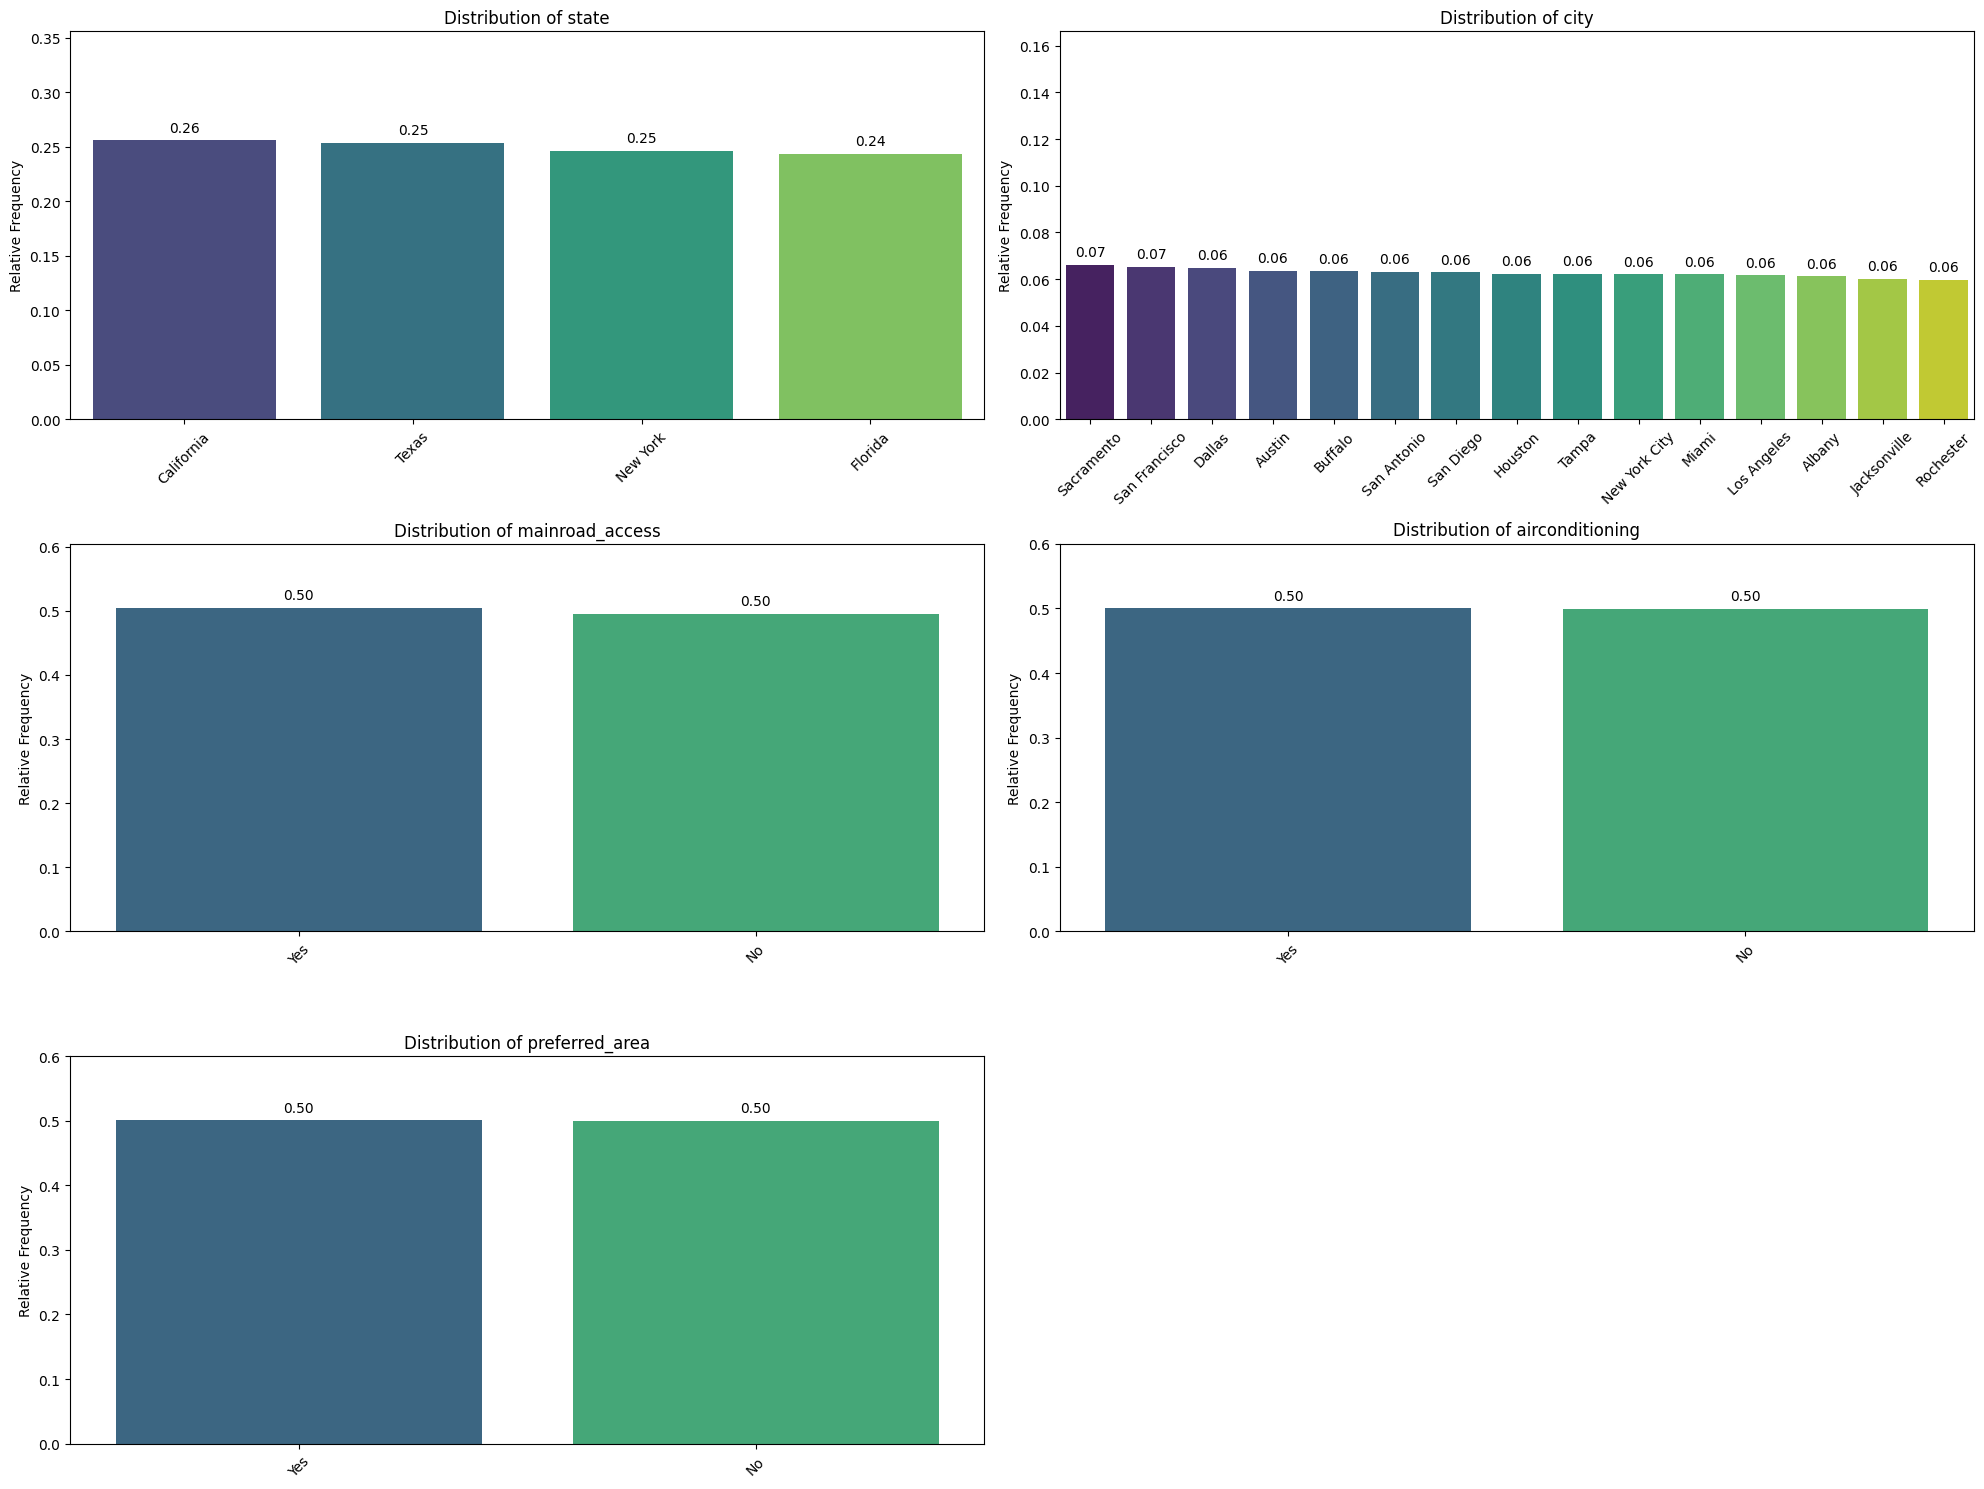

In [110]:
dpf.plot_categorical_distribution(train_set, cat_cols, relative = True, show_values = True, limit = 15)

*It seems to be quite balanced in terms of category features.*

(12, 2)


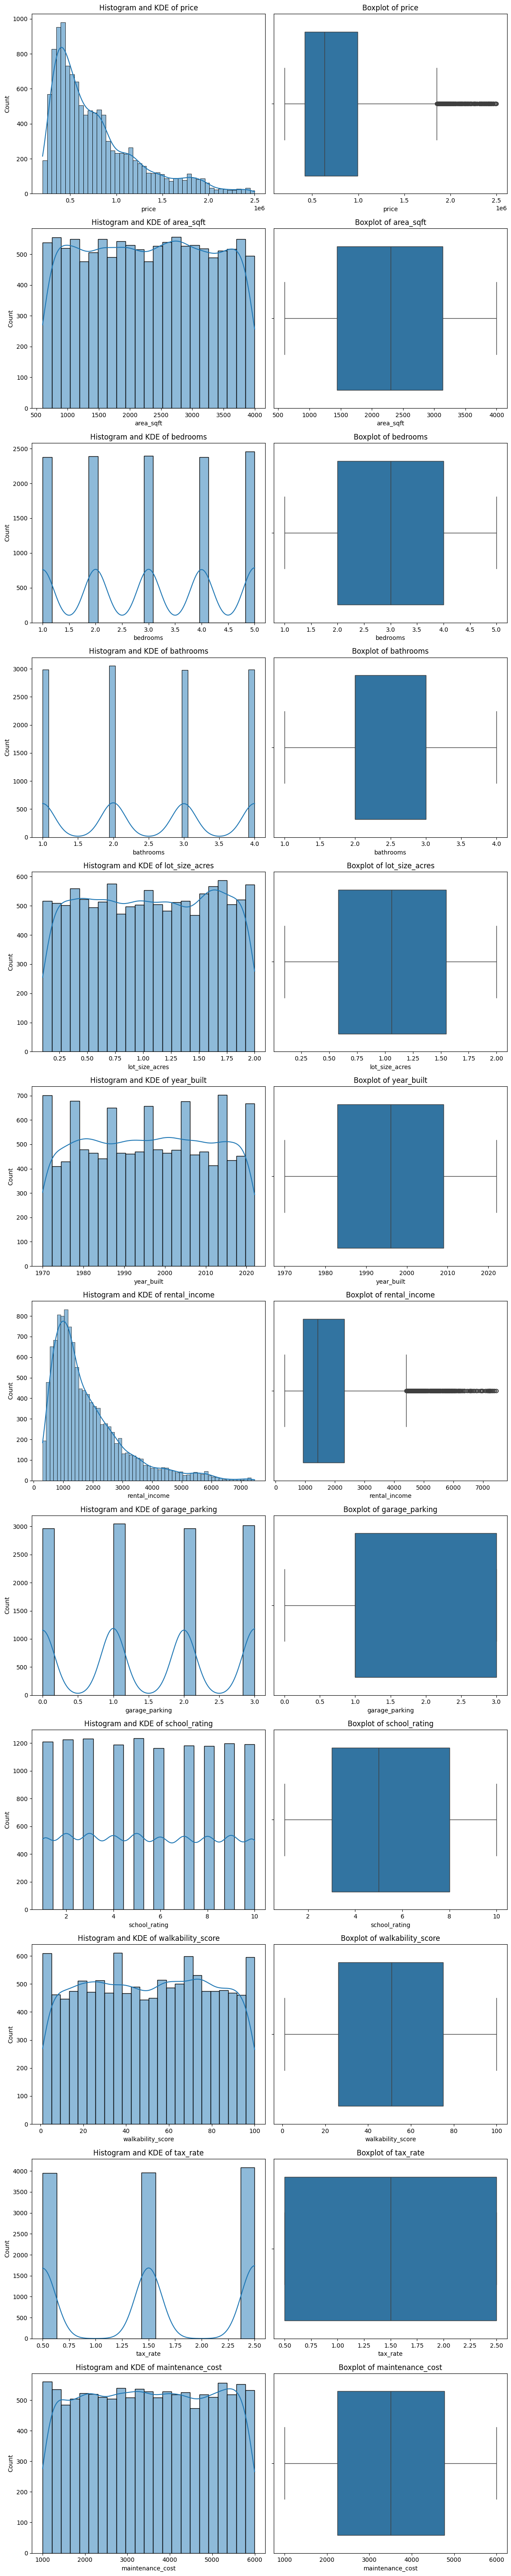

In [111]:
dpf.plot_combined_graphs(train_set, num_cols)

- **Property price**: *Shows a distribution skewed to the right, where most properties have low prices, but there are some significantly more expensive properties (outliers). Strong presence of outliers at the top of the price range.*   

- **Rental income**: *Shows a skewed distribution to the right, similar to that of prices, with most values concentrated in low income and some outliers. Presence of outliers at the high end, representing properties with unusually high rental income.*

- **Maintenance cost**: *Indicates an approximately uniform distribution, suggesting that maintenance costs are relatively evenly distributed among the available values. No significant outliers are present.* 

#### 4.2. Bivariate analysis

In [112]:
features_pairplot = ['price', 'area_sqft', 'lot_size_acres', 'year_built', 'rental_income', 'tax_rate', 'maintenance_cost']

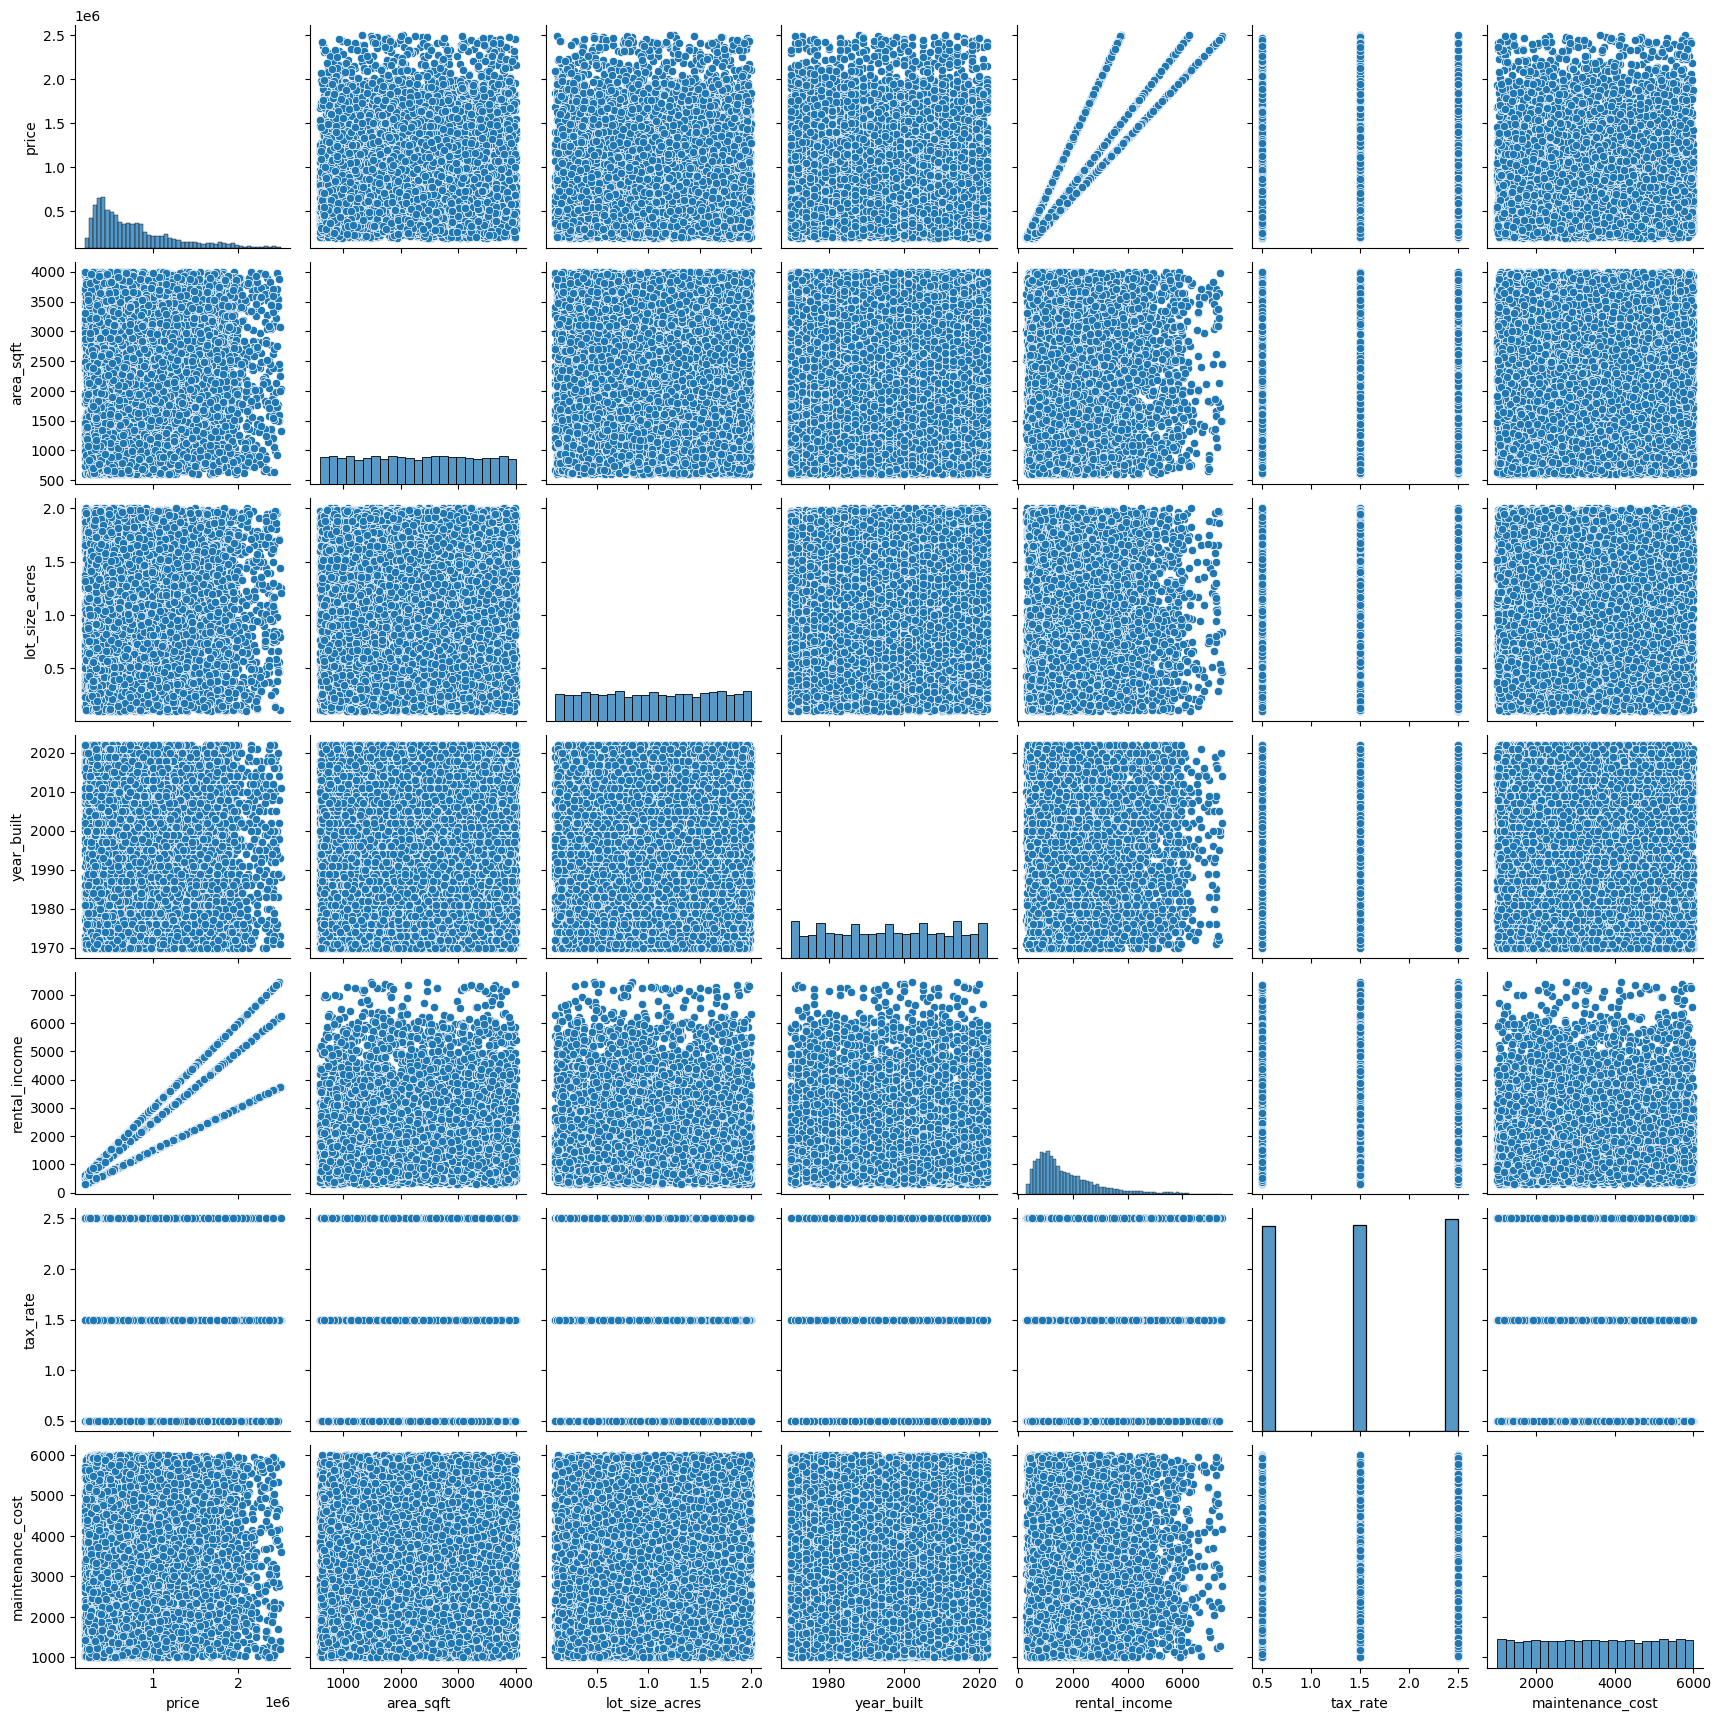

In [113]:
sns.pairplot(train_set[features_pairplot])

- **Price - Rental income**: *It is observed that properties with higher prices tend to generate higher rental income, although the degree of dispersion is considerable. Some higher priced properties do not generate as high rental income.*

*Let's do a bivariate analysis basing it in the column 'price'.*

In [114]:
corr = train_set.corr(numeric_only = True)
np.abs(corr['price']).sort_values(ascending = False)

price                1.000000
rental_income        0.888362
ROI_Simulated        0.027110
bedrooms             0.012129
school_rating        0.010629
area_sqft            0.010425
walkability_score    0.006979
maintenance_cost     0.005109
bathrooms            0.003643
garage_parking       0.002955
tax_rate             0.002787
lot_size_acres       0.000576
year_built           0.000322
Name: price, dtype: float64

<Axes: >

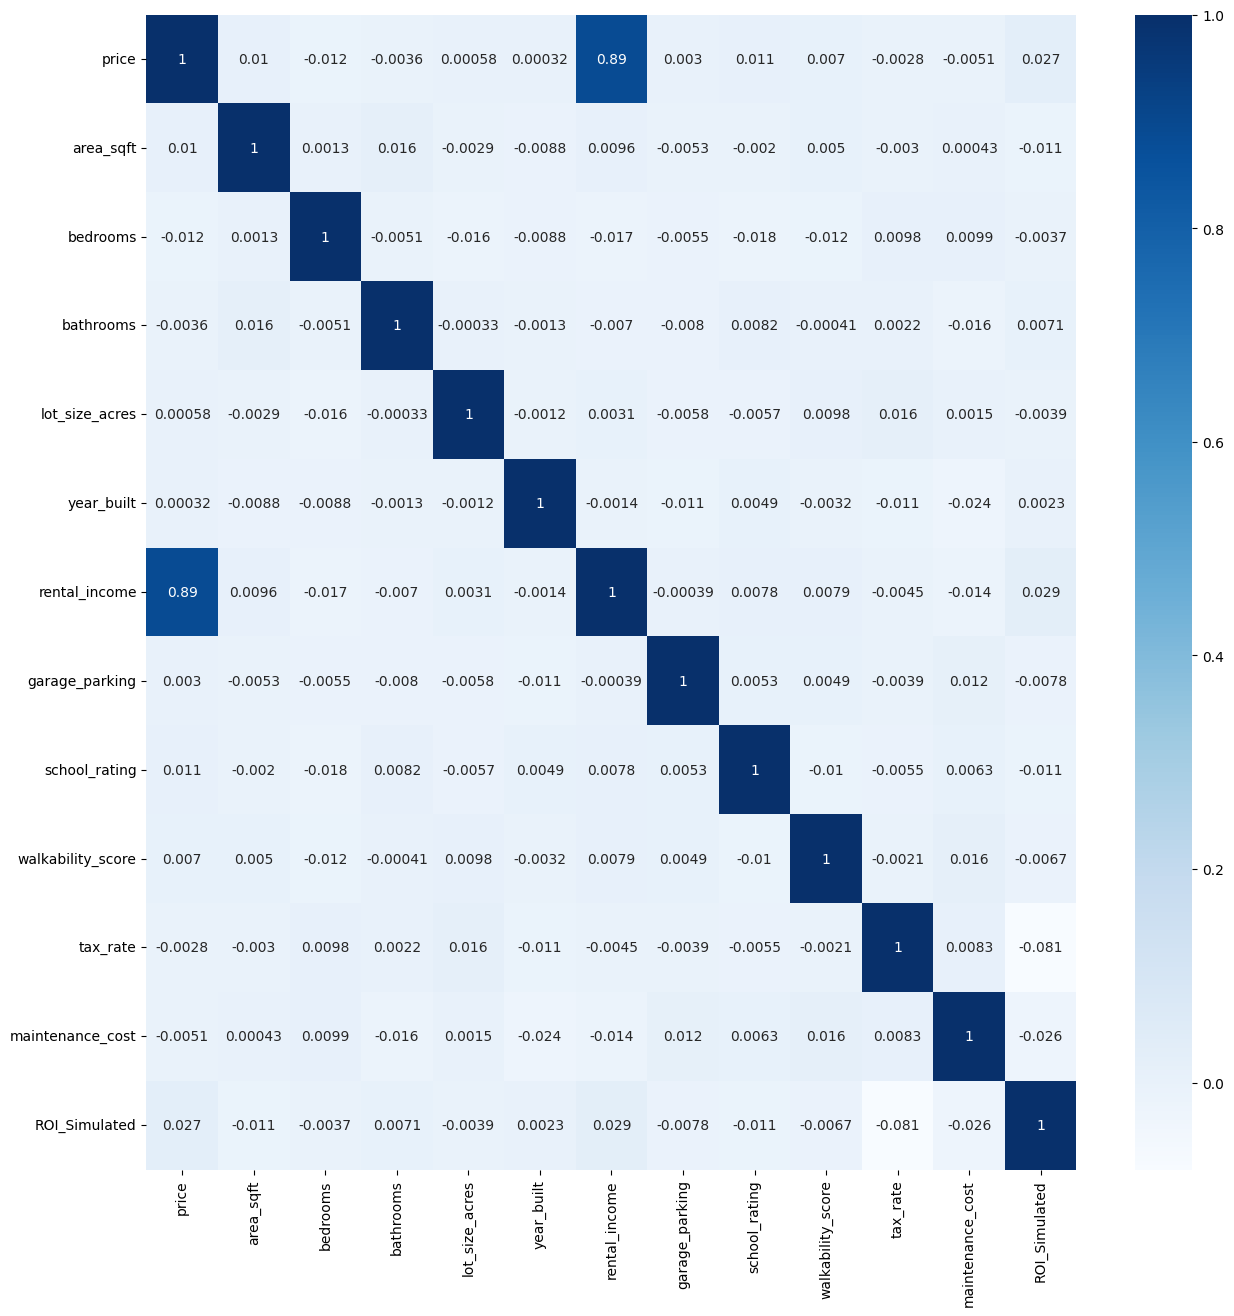

In [115]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = "Blues")

*It seems that doing the EDA without the target column does not give us much information, so let's stop here and when we create it we will resume this step.*

### 5. Create new columns

##### **Understanding ROI and Its Role in the Project**
**What is ROI?**

- **ROI** *stands for **Return on Investment**. It is a metric used to evaluate the profitability of an investment relative to its cost.*   

- *In real estate, ROI is used to determine how profitable a property is based on factors like purchase price, rental income, maintenance costs, and property taxes.*

*The formula for calculating ROI is:*

$$
ROI = \frac{(Rental\ Income \times 12) - Maintenance\ Cost - (Price \times \frac{Tax\ Rate}{100})}{Price} \times 100
$$
​
*Where:*

- *`Rental Income` is the monthly income generated from renting the property.*
- *`Maintenance Cost` is the annual cost of maintaining the property.*
- *`Price` is the purchase price of the property.*
- *`Tax Rate` is the annual property tax rate as a percentage.*

**Why create a ROI column?**

*The ROI column serves as a bridge to our target variable, which classifies properties into categories based on their profitability:*

- *Not profitable (`ROI < 0%`).*
- *Somewhat profitable (`0% ≤ ROI < 4%`).*
- *Highly profitable (`ROI ≥ 4%`).*

**Target Column**

*The target column will be named `profitability_category` and will classify properties into these three profitability categories.*

**Implementation**

*Let's calculate the `ROI` column using the formula and then categorize the properties into the `profitability_category`.*

In [116]:
# Calculate the ROI column
train_set["ROI"] = (
    (train_set["rental_income"] * 12 - train_set["maintenance_cost"] - (train_set["price"] * train_set["tax_rate"] / 100))
    / train_set["price"]) * 100

# Define profitability categories
def categorize_profitability(roi):
    if roi < 4:
        return "Not profitable"
    elif 4 <= roi < 8:
        return "Somewhat profitable"
    else:
        return "Highly profitable"

# Create the profitability_category column
train_set["profitability_category"] = train_set["ROI"].apply(categorize_profitability)

# Display sample data
train_set[["ROI", "profitability_category"]].head()

,ROI,profitability_category
9839,2.862738,Not profitable
9680,1.564682,Not profitable
7093,0.048290,Not profitable
11293,0.397962,Not profitable
820,2.100966,Not profitable


#### *Return to EDA

#### - Univariate analysis

In [117]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
state,4,0.033333,object
city,16,0.133333,object
price,11949,99.575,int64
area_sqft,3317,27.641667,int64
bedrooms,5,0.041667,int64
bathrooms,4,0.033333,int64
lot_size_acres,191,1.591667,float64
year_built,53,0.441667,int64
rental_income,11969,99.741667,float64
mainroad_access,2,0.016667,object


In [118]:
train_set.ROI.describe().round(2)

count    12000.00
mean         0.67
std          1.20
min         -3.31
25%         -0.11
50%          0.73
75%          1.58
max          3.04
Name: ROI, dtype: float64

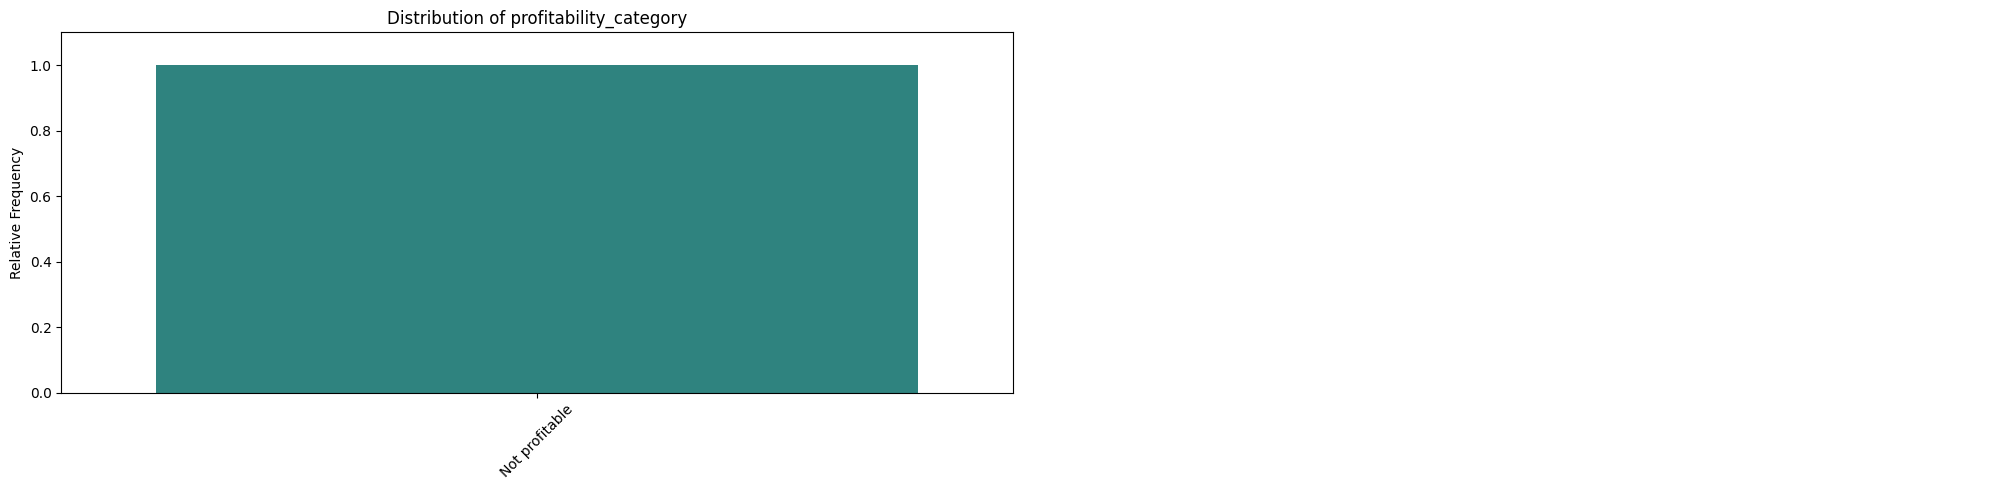

In [119]:
dpf.plot_categorical_distribution(train_set, ['profitability_category'], relative = True)

*In view of this, something will have to be done to equalize the amounts of data for each level of profitability in order for the model to work correctly.*

(2,)


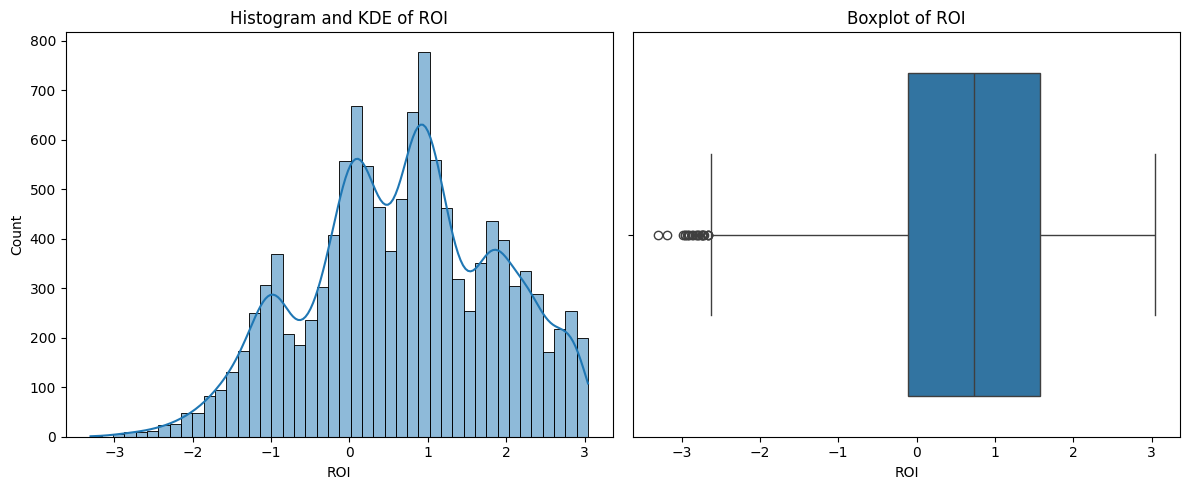

In [120]:
dpf.plot_combined_graphs(train_set, ['ROI'])

*Now that we have the target column we can divide the train set into X_train and y_train.*

In [121]:
target = 'profitability_category'

# Define the features to be used in the model, separating numerical from categorical
numeric_features = ["price", "area_sqft", "bedrooms", "bathrooms", "lot_size_acres",
                    "rental_income", "school_rating", "tax_rate", "maintenance_cost"]
categorical_features = ["state", "city", "mainroad_access", "airconditioning", "preferred_area"]

X_train = train_set[features_set_cat_1]
y_train = train_set[target]
X_test = test_set[features_set_cat_1]
y_test = test_set[target]

NameError: name 'features_set_cat_1' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Define the features to be used in the model
# Separate numerical and categorical features
numeric_features = ["price", "area_sqft", "bedrooms", "bathrooms", "lot_size_acres",
                    "rental_income", "school_rating", "tax_rate", "maintenance_cost"]
categorical_features = ["state", "city", "mainroad_access", "airconditioning", "preferred_area"]

# Step 2: Define transformations for numerical and categorical data
# Normalize (scale) numerical data
numeric_transformer = Pipeline(steps = [
    ("scaler", StandardScaler())
])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine the transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Step 3: Apply the preprocessing pipeline to the training data
# This prepares the data for model input
X_train_transformed = preprocessor.fit_transform(X_train)

# Step 4: Feature Selection (if applicable)
# For simplicity, we will keep all transformed features
# This step can be extended with techniques like Recursive Feature Elimination (RFE)
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features))
)

# Convert the transformed features into a DataFrame for better interpretability
import pandas as pd
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns=feature_names)

# Display a summary of the transformed data
X_train_transformed_df.head()
